In [1]:
import requests
import json
from bs4 import BeautifulSoup
import pandas as pd
from collections import defaultdict
import csv
from itertools import permutations
import matplotlib.pyplot as plt
import networkx as nx
import warnings
import numpy as np
import io

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Preprocess

In [2]:
def clean_players(players):
    players['name'] = players['name'].replace('Goran Dragić', 'Goran Dragic')
    players['name'] = players['name'].replace('Dennis Schröder', 'Dennis Schroder')
    players['name'] = players['name'].replace('Sasha Vujačić', 'Sasha Vujacic')
    players['name'] = players['name'].replace('José Calderón', 'Jose Calderon')
    players['name'] = players['name'].replace('Ömer Aşık', 'Omer Asik')
    players['name'] = players['name'].replace('Alexis Ajinça', 'Alexis Ajinca')
    players['name'] = players['name'].replace('James Ennis', 'James Ennis III')
    players['name'] = players['name'].replace('Bojan Bogdanović', 'Bojan Bogdanovic')
    players['name'] = players['name'].replace('J.J. Redick', 'JJ Redick')
    players['name'] = players['name'].replace('P.J. Hairston', 'PJ Hairston')
    players['name'] = players['name'].replace('J.R. Smith', 'JR Smith')
    players['name'] = players['name'].replace('Kevin Séraphin', 'Kevin Seraphin')
    players['name'] = players['name'].replace('Tomáš Satoranský', 'Tomas Santoransky')
    players['name'] = players['name'].replace('Greivis Vásquez', 'Greivis Vasquez')
    players['name'] = players['name'].replace('Anderson Varejão', 'Anderson Varejao')
    players['name'] = players['name'].replace('Manu Ginóbili', 'Manu Ginobili')
    players['name'] = players['name'].replace('Dāvis Bertāns', 'Davis Bertans')
    players['name'] = players['name'].replace('Nicolás Laprovíttola', 'Nicolas Laprovittola')
    players['name'] = players['name'].replace('Álex Abrines', 'Alex Abrines')
    players['name'] = players['name'].replace('Dario Šarić', 'Dario Saric')
    players['name'] = players['name'].replace('Sergio Rodríguez', 'Sergio Rodriguez')
    players['name'] = players['name'].replace('Tim Hardaway', 'Tim Hardaway Jr.')
    players['name'] = players['name'].replace('Glenn Robinson', 'Glenn Robinson III')
    players['name'] = players['name'].replace('C.J. Miles', 'CJ Miles')
    players['name'] = players['name'].replace('Timothé Luwawu-Cabarrot','Timothe Luwawu-Cabarrot')
    players['name'] = players['name'].replace('Derrick Jones', 'Derrick Jones Jr.')
    players['name'] = players['name'].replace('Tomas Santoransky', 'Tomas Satoransky')
    players['name'] = players['name'].replace('Wesley Iwundu', 'Wes Iwundu')
    players['name'] = players['name'].replace('Miloš Teodosić', 'Milos Teodosic')
    players['name'] = players['name'].replace('Dennis Smith', 'Dennis Smith Jr.')
    players['name'] = players['name'].replace('Bogdan Bogdanović', 'Bogdan Bogdanovic')
    players['name'] = players['name'].replace('Danuel House', 'Danuel House Jr.')
    players['name'] = players['name'].replace('Gary Payton', 'Gary Payton II')
    players['name'] = players['name'].replace('Walt Lemon', 'Walter Lemon Jr.')
    
def map_id():
    df['HOME_PLAYER_ID_1'] = df['HOME_PLAYER_ID_1'].map(player_map)
    df['HOME_PLAYER_ID_2'] = df['HOME_PLAYER_ID_2'].map(player_map)
    df['HOME_PLAYER_ID_3'] = df['HOME_PLAYER_ID_3'].map(player_map)
    df['HOME_PLAYER_ID_4'] = df['HOME_PLAYER_ID_4'].map(player_map)
    df['HOME_PLAYER_ID_5'] = df['HOME_PLAYER_ID_5'].map(player_map)
    df['AWAY_PLAYER_ID_1'] = df['AWAY_PLAYER_ID_1'].map(player_map)
    df['AWAY_PLAYER_ID_2'] = df['AWAY_PLAYER_ID_2'].map(player_map)
    df['AWAY_PLAYER_ID_3'] = df['AWAY_PLAYER_ID_3'].map(player_map)
    df['AWAY_PLAYER_ID_4'] = df['AWAY_PLAYER_ID_4'].map(player_map)
    df['AWAY_PLAYER_ID_5'] = df['AWAY_PLAYER_ID_5'].map(player_map)

In [3]:
players_data = pd.read_csv('NBA_players.csv')
teams_data = pd.read_csv('NBA_teams.csv')
clean_players(players_data)
players_data['Combined'] = players_data['name'] + '_' +  players_data['team'] +  '_' + players_data['year'].astype(str)
teams_data['Combined'] = teams_data['Abbrev'] + '_' +  teams_data['Year'].astype(str)

In [4]:
id_df = pd.read_csv('playerlist.csv')
id_df = id_df[['DISPLAY_FIRST_LAST', 'PERSON_ID']]
player_map = pd.Series(id_df.DISPLAY_FIRST_LAST.values,index=id_df.PERSON_ID).to_dict()

In [5]:
teams = {'CLE':'Cavaliers', 'TOR':'Raptors', 'MIA':'Heat', 'ATL':'Hawks', 'BOS': 'Celtics', 'CHO':'Hornets',
        'IND':'Pacers', 'DET': 'Pistons', 'CHI':'Bulls', 'WAS':'Wizards','ORL':'Magic', 'NYK':'Knicks',
        'BRK':'Nets', 'GSW':'Warriors', 'SAS':'Spurs', 'OKC':'Thunder', 'LAC':'Clippers', 'POR':'Blazers',
        'DAL':'Mavericks', 'MEM':'Grizzlies', 'HOU':'Rockets', 'UTA':'Jazz', 'SAC':'Kings', 'DEN':'Nuggets', 
        'NOP':'Pelicans', 'MIN':'Timberwolves', 'PHO':'Suns', 'LAL':'Lakers', 'MIL':'Bucks', 'PHI':'76ers'}

mascots = {value:key for key, value in teams.items()}

In [106]:
players_data.to_csv('players_data.csv', index=False)

### Cleaning

In [120]:
def clean():
    players['name'] = players['name'].replace('Goran Dragić', 'Goran Dragic')
    players['name'] = players['name'].replace('Dennis Schröder', 'Dennis Schroder')
    players['name'] = players['name'].replace('Sasha Vujačić', 'Sasha Vujacic')
    players['name'] = players['name'].replace('José Calderón', 'Jose Calderon')
    players['name'] = players['name'].replace('Ömer Aşık', 'Omer Asik')
    players['name'] = players['name'].replace('Alexis Ajinça', 'Alexis Ajinca')
    players['name'] = players['name'].replace('James Ennis', 'James Ennis III')
    players['name'] = players['name'].replace('Bojan Bogdanović', 'Bojan Bogdanovic')
    players['name'] = players['name'].replace('J.J. Redick', 'JJ Redick')
    players['name'] = players['name'].replace('P.J. Hairston', 'PJ Hairston')
    players['name'] = players['name'].replace('J.R. Smith', 'JR Smith')
    players['name'] = players['name'].replace('Kevin Séraphin', 'Kevin Seraphin')
    players['name'] = players['name'].replace('Tomáš Satoranský', 'Tomas Santoransky')
    players['name'] = players['name'].replace('Greivis Vásquez', 'Greivis Vasquez')
    players['name'] = players['name'].replace('Anderson Varejão', 'Anderson Varejao')
    players['name'] = players['name'].replace('Manu Ginóbili', 'Manu Ginobili')
    players['name'] = players['name'].replace('Dāvis Bertāns', 'Davis Bertans')
    players['name'] = players['name'].replace('Nicolás Laprovíttola', 'Nicolas Laprovittola')
    players['name'] = players['name'].replace('Álex Abrines', 'Alex Abrines')
    players['name'] = players['name'].replace('Dario Šarić', 'Dario Saric')
    players['name'] = players['name'].replace('Sergio Rodríguez', 'Sergio Rodriguez')
    players['name'] = players['name'].replace('Tim Hardaway', 'Tim Hardaway Jr.')
    players['name'] = players['name'].replace('Glenn Robinson', 'Glenn Robinson III')
    players['name'] = players['name'].replace('C.J. Miles', 'CJ Miles')
    players['name'] = players['name'].replace('Timothé Luwawu-Cabarrot','Timothe Luwawu-Cabarrot')
    players['name'] = players['name'].replace('Derrick Jones', 'Derrick Jones Jr.')
    players['name'] = players['name'].replace('Tomas Santoransky', 'Tomas Satoransky')
    players['name'] = players['name'].replace('Wesley Iwundu', 'Wes Iwundu')
    players['name'] = players['name'].replace('Miloš Teodosić', 'Milos Teodosic')
    players['name'] = players['name'].replace('Dennis Smith', 'Dennis Smith Jr.')
    players['name'] = players['name'].replace('Bogdan Bogdanović', 'Bogdan Bogdanovic')
    players['name'] = players['name'].replace('Danuel House', 'Danuel House Jr.')
    players['name'] = players['name'].replace('Gary Payton', 'Gary Payton II')
    players['name'] = players['name'].replace('Walt Lemon', 'Walter Lemon Jr.')

    df['HOME_PLAYER_ID_1'] = df['HOME_PLAYER_ID_1'].map(player_map)
    df['HOME_PLAYER_ID_2'] = df['HOME_PLAYER_ID_2'].map(player_map)
    df['HOME_PLAYER_ID_3'] = df['HOME_PLAYER_ID_3'].map(player_map)
    df['HOME_PLAYER_ID_4'] = df['HOME_PLAYER_ID_4'].map(player_map)
    df['HOME_PLAYER_ID_5'] = df['HOME_PLAYER_ID_5'].map(player_map)
    df['AWAY_PLAYER_ID_1'] = df['AWAY_PLAYER_ID_1'].map(player_map)
    df['AWAY_PLAYER_ID_2'] = df['AWAY_PLAYER_ID_2'].map(player_map)
    df['AWAY_PLAYER_ID_3'] = df['AWAY_PLAYER_ID_3'].map(player_map)
    df['AWAY_PLAYER_ID_4'] = df['AWAY_PLAYER_ID_4'].map(player_map)
    df['AWAY_PLAYER_ID_5'] = df['AWAY_PLAYER_ID_5'].map(player_map)

### Creating Player Network

In [6]:
def create_network(mascot):
    subset = df.loc[df.HOME_TEAM.str.contains(mascot) | df.AWAY_TEAM.str.contains(mascot)]
    subset = subset[['GAME_ID','HOMEDESCRIPTION', 'VISITORDESCRIPTION','PCTIMESTRING', 'PERIOD', 'HOME_TEAM', 'AWAY_TEAM',
                'HOME_PLAYER_ID_1','HOME_PLAYER_ID_2', 'HOME_PLAYER_ID_3','HOME_PLAYER_ID_4','HOME_PLAYER_ID_5',
                'AWAY_PLAYER_ID_1','AWAY_PLAYER_ID_2', 'AWAY_PLAYER_ID_3','AWAY_PLAYER_ID_4','AWAY_PLAYER_ID_5']]
    edge_list = []
    nums = 0
    for game_id in subset['GAME_ID'].unique():
        boolean = False
        dic = defaultdict(int)
        subs = subset.loc[df.GAME_ID == game_id]
        names = subs.iloc[0][['HOME_PLAYER_ID_1','HOME_PLAYER_ID_2','HOME_PLAYER_ID_3','HOME_PLAYER_ID_4','HOME_PLAYER_ID_5']].values
        for name in names: 
            for team in list(players.loc[players['name'] == name].team.values):
                dic[team] += 1
        boolean = teams[max(dic, key=dic.get)] == mascot

        if boolean:        
            new = subs[['HOMEDESCRIPTION', 'PCTIMESTRING', 'PERIOD', 'HOME_TEAM', 'HOME_PLAYER_ID_1',
                             'HOME_PLAYER_ID_2', 'HOME_PLAYER_ID_3', 'HOME_PLAYER_ID_4', 'HOME_PLAYER_ID_5']]
            new['PCTIMESTRING'] = new['PCTIMESTRING'].str.split(":").apply(lambda x: int(x[0])*60 + int(x[1]))
            new = new[new['HOMEDESCRIPTION'].shift(-1).str.contains('SUB', na=False) |
               new['HOMEDESCRIPTION'].str.contains('SUB', na=False)]
            new = new[~new['HOMEDESCRIPTION'].str.contains('SUB', na=False)]

            curr_seconds = 720
            curr_period = 1
            for row in new.itertuples():
                if row.PERIOD > curr_period:
                    curr_period = row.PERIOD 
                    curr_seconds = 720 
                mutual_time = curr_seconds - row.PCTIMESTRING
                for p1 in range(5,9):
                    for p2 in range(p1+1, 9):
                        mutual_mins = round((curr_seconds - row.PCTIMESTRING)/60, 2)
                        edge_list.append([sorted([row[p1], row[p2]])[0], sorted([row[p1], row[p2]])[1] ,mutual_mins])
    #                     print([sorted([row[p1], row[p2]])[0], sorted([row[p1], row[p2]])[1] ,mutual_mins])
                curr_seconds = row.PCTIMESTRING
#             print('\n')

        else:
            new = subs[['VISITORDESCRIPTION', 'PCTIMESTRING', 'PERIOD', 'AWAY_TEAM', 'AWAY_PLAYER_ID_1',
                             'AWAY_PLAYER_ID_2', 'AWAY_PLAYER_ID_3', 'AWAY_PLAYER_ID_4', 'AWAY_PLAYER_ID_5']]
            new['PCTIMESTRING'] = new['PCTIMESTRING'].str.split(":").apply(lambda x: int(x[0])*60 + int(x[1]))
            new = new[new['VISITORDESCRIPTION'].shift(-1).str.contains('SUB', na=False) |
                   new['VISITORDESCRIPTION'].str.contains('SUB', na=False)]
            new = new[~new['VISITORDESCRIPTION'].str.contains('SUB', na=False)]

            curr_seconds = 720
            curr_period = 1
            for row in new.itertuples():
                if row.PERIOD > curr_period:
                    curr_period = row.PERIOD 
                    curr_seconds = 720 
                mutual_time = curr_seconds - row.PCTIMESTRING
                for p1 in range(5,9):
                    for p2 in range(p1+1, 9):
                        mutual_mins = round((curr_seconds - row.PCTIMESTRING)/60, 2)
                        edge_list.append([sorted([row[p1], row[p2]])[0], sorted([row[p1], row[p2]])[1] ,mutual_mins])
    #                     print([sorted([row[p1], row[p2]])[0], sorted([row[p1], row[p2]])[1] ,mutual_mins])
                curr_seconds = row.PCTIMESTRING
#         print('\n')
    edges = pd.DataFrame(edge_list)
    edges.columns =['P1', 'P2', 'MutualTime'] 
    edges = edges.groupby(['P1','P2']).sum().reset_index()
    
    team = mascots.get(mascot)
    edges['P1'] = edges['P1'] + '_' + team + '_' + str(year)
    edges['P2'] = edges['P2'] + '_' + team + '_' + str(year)
    edgeList = edges.values.tolist()
#     G=nx.from_pandas_edgelist(edges, 'P1', 'P2', ['MutualTime'])
    return edgeList

### Total edges

In [10]:
%%time
edges = []
for x in range(2016, 2020):
    year = x
    previous_year = x-1
    
    URL = 'https://eightthirtyfour.com/nba/pbp/events_{}-{}_pbp.csv'
    URL = URL.format(str(previous_year), str(year))
    print(URL)
    r = requests.get(URL, verify=False).content
    
    df = pd.read_csv(io.StringIO(r.decode('utf-8')))
    players = players_data.loc[players_data.year == year]
    clean_players(players)
    map_id()
    print(year)
    for i in teams.values():
        team_edge = create_network(i)
        edges.append(team_edge)


https://eightthirtyfour.com/nba/pbp/events_2015-2016_pbp.csv
2016
https://eightthirtyfour.com/nba/pbp/events_2016-2017_pbp.csv
2017
https://eightthirtyfour.com/nba/pbp/events_2017-2018_pbp.csv
2018
https://eightthirtyfour.com/nba/pbp/events_2018-2019_pbp.csv
2019
CPU times: user 2min 49s, sys: 18.4 s, total: 3min 8s
Wall time: 2min 58s


In [147]:
G = nx.Graph()
for team in range(len(edges)):
    for player_edge in range(len(edges[team])):
        G.add_edge(edges[team][player_edge][0], edges[team][player_edge][1], weight=edges[team][player_edge][2])
edge,weights = zip(*nx.get_edge_attributes(G,'weight').items())

In [148]:
ppg_dict = {}
apg_dict = {}
rpg_dict = {}
three_point_percentage_dict = {}
two_point_percentage_dict = {}
mp_dict = {}
gp_dict = {}

for idx,node in players_data.iterrows():
    ppg_dict[node[10]] = node[3]
    apg_dict[node[10]] = node[4]
    rpg_dict[node[10]] = node[5]
    three_point_percentage_dict[node[10]] = node[6]
    two_point_percentage_dict[node[10]] = node[7]
    mp_dict[node[10]] = node[8]
    gp_dict[node[10]] = node[9]

nx.set_node_attributes(G, ppg_dict, 'ppg')
nx.set_node_attributes(G, apg_dict, 'apg')
nx.set_node_attributes(G, rpg_dict, 'rpg')
nx.set_node_attributes(G, three_point_percentage_dict, '3P%')
nx.set_node_attributes(G, two_point_percentage_dict, '2P%')
nx.set_node_attributes(G, mp_dict, 'mp')
nx.set_node_attributes(G, gp_dict, 'gp')

In [165]:
matrix = nx.adjacency_matrix(G).A
nodes = list(G.nodes())
# labels = [teams_data.loc[teams_data.Combined == x[-8:]].Standing.item() for x in nodes]
labels = [teams_data.loc[teams_data.Combined == x[-8:]].Playoff.item() for x in nodes]
rows = len(matrix)
columns = len(matrix[0])
num_classes = 2

In [166]:
A = build_adj(nodes,list(edge))

In [167]:
train_idx, val_idx, test_idx = limit_data(labels)

In [168]:
train_mask = np.zeros((rows,),dtype=bool)
train_mask[train_idx] = True

val_mask = np.zeros((rows,),dtype=bool)
val_mask[val_idx] = True

test_mask = np.zeros((rows,),dtype=bool)
test_mask[test_idx] = True

labels_encoded, classes = encode_label(labels)

In [169]:
# Standings labels
# GraphSage(A, columns, rows, matrix, train_mask, val_mask, labels_encoded, num_classes, 'mean', 10, 0.5, 5e-4, 0.001,50, 50)

# Binary Playoff labels
GraphSage(A, columns, rows, matrix, train_mask, val_mask, labels_encoded, num_classes, 'mean', 10, 0.5, 5e-4, 0.001,50, 50)

Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 0.0226 - acc: 0.5000 - val_loss: 0.1623 - val_acc: 0.5540
Epoch 2/50
1/1 [==============================] - 1s 599ms/step - loss: 0.0200 - acc: 0.5000 - val_loss: 0.1612 - val_acc: 0.5800
Epoch 3/50
1/1 [==============================] - 1s 792ms/step - loss: 0.0199 - acc: 0.5000 - val_loss: 0.1601 - val_acc: 0.5840
Epoch 4/50
1/1 [==============================] - 1s 697ms/step - loss: 0.0180 - acc: 0.5000 - val_loss: 0.1592 - val_acc: 0.6100
Epoch 5/50
1/1 [==============================] - 1s 692ms/step - loss: 0.0173 - acc: 0.6000 - val_loss: 0.1583 - val_acc: 0.6100
Epoch 6/50
1/1 [==============================] - 1s 903ms/step - loss: 0.0159 - acc: 0.6000 - val_loss: 0.1575 - val_acc: 0.6100
Epoch 7/50
1/1 [==============================] - 1s 711ms/step - loss: 0.0148 - acc: 0.6000 - val_loss: 0.1567 - val_acc: 0.6120
Epoch 8/50
1/1 [==============================] - 1s 992ms/step - loss: 0.0136 - acc: 0.6000 

### Necessary Functions

In [40]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical


def limit_data(labels,limit=20,val_num=500,test_num=1000):
    '''
    Get the index of train, validation, and test data
    '''
    label_counter = dict((l, 0) for l in labels)
    train_idx = []

    for i in range(len(labels)):
        label = labels[i]
        if label_counter[label]<limit:
            #add the example to the training data
            train_idx.append(i)
            label_counter[label]+=1

        #exit the loop once we found 20 examples for each class
        if all(count == limit for count in label_counter.values()):
            break

    #get the indices that do not go to traning data
    rest_idx = [x for x in range(len(labels)) if x not in train_idx]
    #get the first val_num
    val_idx = rest_idx[:val_num]
    test_idx = rest_idx[val_num:(val_num+test_num)]
    return train_idx, val_idx, test_idx

def encode_label(labels):
    label_encoder = LabelEncoder()
    labels = label_encoder.fit_transform(labels)
    labels = to_categorical(labels)
    return labels, len(label_encoder.classes_)

def build_adj(nodes, edge_list):
    G = nx.Graph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edge_list)

    #obtain the adjacency matrix (A)
    A = nx.adjacency_matrix(G)
    return A

In [15]:
from spektral.layers import GCNConv
from spektral.layers import GraphSageConv

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dropout
# from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
import tensorflow as tf
from tensorflow.keras.regularizers import l2


def GraphSage(A, F, N, X, train_mask, val_mask, labels_encoded, num_classes, aggr, channels, dropout, l2_reg, learning_rate, epochs, es_patience):

    A = GCNConv.preprocess(A).astype('f4')

    X_in = Input(shape=(F, ))
    fltr_in = Input((N, ), sparse=True)

    dropout_1 = Dropout(dropout)(X_in)
    graph_conv_1 = GraphSageConv(channels, aggregate_op=aggr,
                            activation='relu',
                            kernel_regularizer=l2(l2_reg),
                            use_bias=False)([dropout_1, fltr_in])

    dropout_2 = Dropout(dropout)(graph_conv_1)
    graph_conv_2 = GCNConv(num_classes,
                         activation='softmax',
                         use_bias=False)([dropout_2, fltr_in])

    model = Model(inputs=[X_in, fltr_in], outputs=graph_conv_2)
    optimizer = Adam(lr=learning_rate)
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  weighted_metrics=['acc'])

#     tbCallBack_GCN = tf.keras.callbacks.TensorBoard(
#         log_dir='./Tensorboard_GCN_cora',
#     )
#     callback_GCN = [tbCallBack_GCN]

    validation_data = ([X, A], labels_encoded, val_mask)
    model.fit([X, A],
          labels_encoded,
          sample_weight=train_mask,
          epochs=epochs,
          batch_size=N,
          validation_data=validation_data,
          shuffle=False,
          callbacks=[
              EarlyStopping(patience=es_patience,  restore_best_weights=True)
#               ,tbCallBack_GCN
          ])

### Graph Visualization

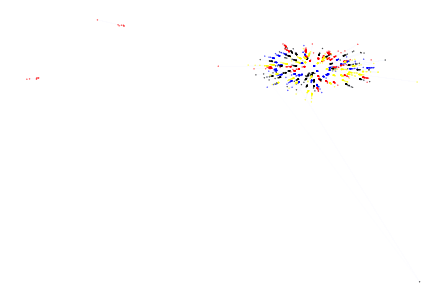

In [104]:
color_map = []
for node in G:
    if node[-4:] == '2016':
        color_map.append('blue')
    if node[-4:] == '2017':
        color_map.append('red')
    if node[-4:] == '2018':
        color_map.append('black')
    if node[-4:] == '2019':
        color_map.append('yellow')

layout = nx.spring_layout(G)
# nx.draw(G,with_labels=False, node_color=color_map, edge_cmap=plt.cm.Blues, edge_color=weights, width=0.75, node_size=1)
nx.draw(G,with_labels=False, node_color=color_map, edge_cmap=plt.cm.Blues, edge_color=weights, width=0.1, node_size=0.1, k = 0.25)
# plt.savefig("graph.png", dpi=500)

In [141]:
# players = players_data
# len(players[~players['Combined'].isin(list(G.nodes()))])

In [ ]:
#iterate through years 2016-2020:
    #grab team and format link for season
        #subset players to grab specific year 
        #map and clean players dataset
    #create edgelist of entire season
    #create adjacency matrix 
    #grab labels